In [1]:
from sklearn import datasets
import numpy as np
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [2]:
iris = datasets.load_iris()
data = iris['data']
label = iris['target']
hoa = iris['target_names']  

In [3]:
#Các đặc tính của data
iris['feature_names'],len(data),len(label),hoa

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 150,
 150,
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

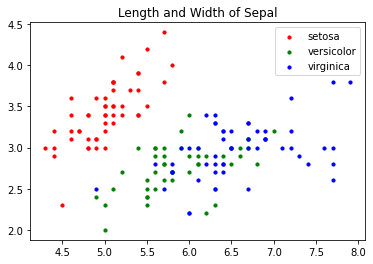

In [30]:
#Phân bổ data
index0=np.where(iris.target==0)
index1=np.where(iris.target==1)
index2=np.where(iris.target==2)

x0=iris.data[index0][:,0]
y0=iris.data[index0][:,1]
x1=iris.data[index1][:,0]
y1=iris.data[index1][:,1]
x2=iris.data[index2][:,0]
y2=iris.data[index2][:,1]

import matplotlib.pyplot as plt
plt.figure()
area = 10  # 0 to 15 point radii
plt.scatter(x0, y0, s=area, color='red')
plt.scatter(x1, y1, s=area, color='green')
plt.scatter(x2, y2, s=area, color='blue')
plt.legend([hoa[0],hoa[1],hoa[2]])
plt.title('Length and Width of Sepal')
plt.show()

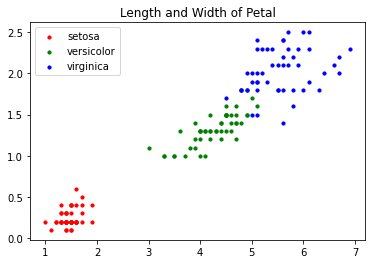

In [31]:
x0=iris.data[index0][:,2]
y0=iris.data[index0][:,3]
x1=iris.data[index1][:,2]
y1=iris.data[index1][:,3]
x2=iris.data[index2][:,2]
y2=iris.data[index2][:,3]

import matplotlib.pyplot as plt
plt.figure()
area = 10  # 0 to 15 point radii
plt.scatter(x0, y0, s=area, color='red')
plt.scatter(x1, y1, s=area, color='green')
plt.scatter(x2, y2, s=area, color='blue')
plt.legend([hoa[0],hoa[1],hoa[2]])
plt.title('Length and Width of Petal')
plt.show()

In [32]:
X_train,X_test,y_train,y_test = train_test_split(data,label,test_size = .2)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((120, 4), (120,), (30, 4), (30,))

In [33]:
#Phân loại theo lớp 
def separate_by_class(data,labels):
  dataset = {}
  for i in list(set(y_train)):
    arr = []
    for j in range(len(y_train)):
      if(i==y_train[j]):
        arr.append(X_train[j])
    dataset[i] = arr
  return dataset

In [34]:
summarize = separate_by_class(X_train,y_train)
summarize

{0: [array([4.5, 2.3, 1.3, 0.3]),
  array([5.4, 3.9, 1.7, 0.4]),
  array([5.8, 4. , 1.2, 0.2]),
  array([4.8, 3.4, 1.9, 0.2]),
  array([5.2, 3.4, 1.4, 0.2]),
  array([4.3, 3. , 1.1, 0.1]),
  array([5.1, 3.5, 1.4, 0.3]),
  array([5. , 3.6, 1.4, 0.2]),
  array([4.7, 3.2, 1.3, 0.2]),
  array([5. , 3.3, 1.4, 0.2]),
  array([5.1, 3.8, 1.5, 0.3]),
  array([5.7, 4.4, 1.5, 0.4]),
  array([5.4, 3.9, 1.3, 0.4]),
  array([5.1, 3.8, 1.9, 0.4]),
  array([5.1, 3.5, 1.4, 0.2]),
  array([5.5, 3.5, 1.3, 0.2]),
  array([4.8, 3.4, 1.6, 0.2]),
  array([4.6, 3.4, 1.4, 0.3]),
  array([5.5, 4.2, 1.4, 0.2]),
  array([5. , 3.4, 1.6, 0.4]),
  array([5.1, 3.4, 1.5, 0.2]),
  array([5.1, 3.3, 1.7, 0.5]),
  array([4.7, 3.2, 1.6, 0.2]),
  array([4.6, 3.2, 1.4, 0.2]),
  array([5. , 3.5, 1.3, 0.3]),
  array([5. , 3.4, 1.5, 0.2]),
  array([5.3, 3.7, 1.5, 0.2]),
  array([5.4, 3.4, 1.7, 0.2]),
  array([4.6, 3.6, 1. , 0.2]),
  array([4.8, 3.1, 1.6, 0.2]),
  array([5. , 3.2, 1.2, 0.2]),
  array([5. , 3. , 1.6, 0.2]),
  arr

In [35]:
len(summarize[0]),len(summarize[1])

(39, 39)

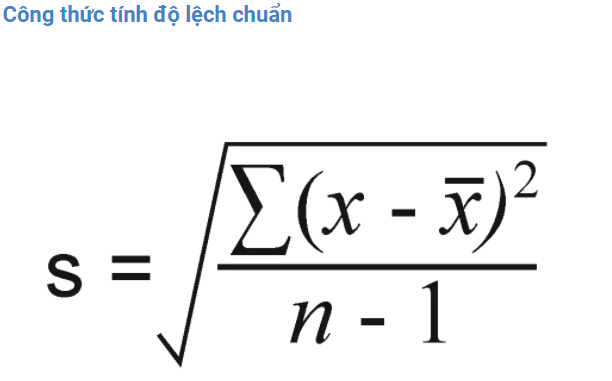

In [36]:
def mean(x):
  return np.mean(x)
def dolechchuan(numbers):
	avg = mean(numbers)
	variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
	return np.sqrt(variance)

In [37]:
#Xác xuất Gauss native bayes
def calculate_probability(x, mean, stdev):
	exponent = np.exp(-((x-mean)**2 / (2 * stdev**2 )))
	return (1 / (np.sqrt(2 * np.pi) * stdev)) * exponent

In [38]:
#Tính xác xuất của lớp
def P_w(w):
  return len(summarize[w])/len(X_train)

In [39]:
P_w(0),P_w(1)

(0.325, 0.325)

In [40]:
#Tính mean và std theo từng lớp
def mean_std_w(x):
  data = {}
  for i,j in x.items():
    arr = []
    for u in zip(*j): #Phân ra giá trị của mỗi lớp
      arr.append([mean(u),dolechchuan(u)])
    data[i]=arr
  return data

In [41]:
mean_std = mean_std_w(summarize)
mean_std

{0: [[5.017948717948718, 0.35383001782136986],
  [3.471794871794872, 0.39131944007873637],
  [1.4538461538461538, 0.19035445309675628],
  [0.24615384615384606, 0.09132404377632387]],
 1: [[5.958974358974358, 0.5456613315958172],
  [2.7615384615384615, 0.3297649758104324],
  [4.305128205128205, 0.4850115125864854],
  [1.3461538461538463, 0.20371051938597087]],
 2: [[6.642857142857144, 0.580219830982024],
  [3.007142857142857, 0.32339122055662084],
  [5.576190476190477, 0.5341094817017108],
  [2.045238095238095, 0.27426387592117885]]}

In [42]:
#Tính xác xuát lớp theo Gauss native bayes
def nativebayes_gauss(x,mean_std_w):
  kq = []
  for k,v in mean_std_w.items():
    s = 1
    for i in range(len(v)):
      s*=calculate_probability(x[i],v[i][0],v[i][1])
    kq.append(s*P_w(k))
  return kq

In [43]:
nativebayes_gauss(X_test[1],mean_std)

[2.6608596626797386e-97, 0.14631982714510613, 0.0005920121097091217]

In [44]:
#Hàm dự đoán
def predict(likelihood_gauss):
  return np.argmax(nativebayes_gauss)

In [52]:
predict(nativebayes_gauss(X_test[20],mean_std))

0

In [53]:
def accuracy(x_test,y_test,mean_std_w):
  s = 0
  for i in range(len(x_test)):
    kq = nativebayes_gauss(x_test[i],mean_std_w)
    pre =predict(kq)
    if(pre == y_test[i]):
      s+=1
  return s/len(x_test) 

In [54]:
accuracy(X_test,y_test,mean_std)

0.36666666666666664

In [57]:
iris_hoa = {0:'setosa',1:'versicolor',2:'virginica'}
print(pred)
for i in range(30):
    c = nativebayes_gauss(X_test[i],mean_std)
    pred = predict(c)
    print(pred)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [58]:
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [59]:
from sklearn import metrics
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


In [62]:
for i in range(30):
  b = X_test[i].reshape(1,-1)
  a = model.predict(b)
  print(a)

[0]
[1]
[0]
[2]
[1]
[1]
[1]
[0]
[0]
[1]
[1]
[0]
[2]
[1]
[2]
[1]
[1]
[0]
[0]
[0]
[2]
[1]
[1]
[0]
[1]
[1]
[2]
[0]
[2]
[0]
